# Prompt

I want to explore the fundamentals of hypothesis testing because its good review, specifically the null and alternative hypothesis and different types of errors. could you illustrate this visually by making python code to simulate an experiment? could you generate 3 quick visualizations of different experiments so i can select the best one?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:

# --- Scenario 1: Coin Flip Experiment (Testing for Fairness) ---

def plot_coin_flip_simulation(num_experiments=1000, num_flips_per_experiment=100, true_p_heads=0.5, h0_p_heads=0.5, alpha=0.05):
    """
    Simulates coin flip experiments and plots the distribution of observed head proportions.

    Illustrates:
    - Null Hypothesis (H0): The coin is fair (p_heads = h0_p_heads).
    - Alternative Hypothesis (Ha): The coin is not fair (p_heads != h0_p_heads).
    - Type I Error: Rejecting H0 when it's true. Visually, this would be observing a
      sample proportion in the "tails" of the distribution if H0 were true.
    - Type II Error: Failing to reject H0 when it's false (i.e., Ha is true).
      If true_p_heads is different from h0_p_heads, the distribution will be centered
      elsewhere, and we can see the overlap with the H0 acceptance region.
    """
    observed_proportions = []
    for _ in range(num_experiments):
        flips = np.random.rand(num_flips_per_experiment) < true_p_heads
        observed_proportions.append(np.mean(flips))

    plt.figure(figsize=(10, 6))
    plt.hist(observed_proportions, bins=30, density=True, alpha=0.7, label=f'Simulated Proportions (True p={true_p_heads})')

    # Distribution under H0
    # Using normal approximation for the sampling distribution of the proportion
    # Mean = p, SD = sqrt(p(1-p)/n)
    h0_sd = np.sqrt(h0_p_heads * (1 - h0_p_heads) / num_flips_per_experiment)
    x = np.linspace(h0_p_heads - 4*h0_sd, h0_p_heads + 4*h0_sd, 500)
    h0_dist = stats.norm.pdf(x, h0_p_heads, h0_sd)
    plt.plot(x, h0_dist, 'r--', label=f'Expected Dist. if H0 is True (p={h0_p_heads})')

    plt.axvline(h0_p_heads, color='red', linestyle='-', linewidth=2, label=f'H0: p = {h0_p_heads}')

    # Critical regions for Type I error if H0 is true
    # Two-tailed test
    lower_crit = stats.norm.ppf(alpha/2, loc=h0_p_heads, scale=h0_sd)
    upper_crit = stats.norm.ppf(1 - alpha/2, loc=h0_p_heads, scale=h0_sd)
    plt.axvline(lower_crit, color='orange', linestyle=':', linewidth=2, label=f'Lower Critical Value (alpha={alpha})')
    plt.axvline(upper_crit, color='orange', linestyle=':', linewidth=2, label=f'Upper Critical Value (alpha={alpha})')
    plt.fill_between(x, 0, h0_dist, where=(x <= lower_crit) | (x >= upper_crit), color='orange', alpha=0.3, label='Type I Error Region if H0 True')


    plt.title('Coin Flip Experiment Simulation')
    plt.xlabel('Proportion of Heads in Sample')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print(f"""
    Scenario 1: Coin Flip Experiment
    H0: The coin is fair (p_heads = {h0_p_heads}).
    Ha: The coin is not fair (p_heads != {h0_p_heads}).
    This plot shows the distribution of sample proportions from {num_experiments} simulated experiments.
    - If the true probability of heads (true_p_heads) is {true_p_heads}, the histogram will be centered around this value.
    - The red dashed line shows the expected distribution if the Null Hypothesis (coin is fair at p={h0_p_heads}) were true.
    - The orange dotted lines mark critical values for a significance level of alpha={alpha}. If an observed proportion falls
      outside these lines, we might reject H0.
    - Type I Error (False Positive): If H0 is true (coin is fair) but our sample proportion by chance falls in the orange shaded regions,
      we would incorrectly reject H0. The area of these orange regions under the red H0 curve represents alpha.
    - Type II Error (False Negative): If H0 is false (e.g., true_p_heads = 0.6, but H0 assumes 0.5), but our sample proportion
      by chance falls within the critical values (between the orange lines), we would incorrectly fail to reject H0.
      This is more likely if the true effect is small or sample size is low.
    """)


In [3]:
# --- Scenario 2: Website A/B Test (Comparing Conversion Rates) ---

def plot_ab_test_simulation(mean_A=0.10, std_A=0.03, n_A=1000, mean_B=0.12, std_B=0.035, n_B=1000, alpha=0.05):
    """
    Simulates and plots the sampling distributions for conversion rates of two website designs.

    Illustrates:
    - Null Hypothesis (H0): New design B is not better than A (mean_B <= mean_A).
      For simplicity in visualization of errors, often visualized as mean_B = mean_A.
    - Alternative Hypothesis (Ha): New design B is better than A (mean_B > mean_A).
    - Type I Error: Concluding B is better when it's not (rejecting H0 when H0 is true).
    - Type II Error: Failing to conclude B is better when it actually is (failing to reject H0 when Ha is true).
    """
    # Sampling distributions (Normal approximation)
    # Assuming H0: mean_A = mean_B. For visualization, let's assume for H0 that mean_B_under_H0 = mean_A
    # And for Ha, mean_B_under_Ha = mean_B (the true mean_B if there is an effect)

    # Distribution of sample mean for A
    se_A = std_A / np.sqrt(n_A)
    # x_A = np.linspace(mean_A - 4*se_A, mean_A + 4*se_A, 500) # Not directly plotted, but used in difference
    # dist_A = stats.norm.pdf(x_A, mean_A, se_A)

    # Distribution of sample mean for B *IF H0 IS TRUE* (i.e., mean_B = mean_A)
    mean_B_h0 = mean_A
    se_B_h0 = std_B / np.sqrt(n_B) # Using actual std_B for spread, but mean_A for center under H0
    # x_B_h0 = np.linspace(mean_B_h0 - 4*se_B_h0, mean_B_h0 + 4*se_B_h0, 500) # Not directly plotted
    # dist_B_h0 = stats.norm.pdf(x_B_h0, mean_B_h0, se_B_h0)


    # Distribution of sample mean for B *IF Ha IS TRUE* (i.e., mean_B is its actual value, different from mean_A)
    se_B_ha = std_B / np.sqrt(n_B)
    # x_B_ha = np.linspace(mean_B - 4*se_B_ha, mean_B + 4*se_B_ha, 500) # Not directly plotted
    # dist_B_ha = stats.norm.pdf(x_B_ha, mean_B, se_B_ha)

    # For hypothesis testing, we look at the difference in means: D = mean_B - mean_A
    # H0: D_h0 = 0
    # Ha: D_ha = mean_B - mean_A
    mean_diff_h0 = 0
    std_diff_h0 = np.sqrt(se_A**2 + se_B_h0**2)

    mean_diff_ha = mean_B - mean_A
    std_diff_ha = np.sqrt(se_A**2 + se_B_ha**2)

    x_diff_min = min(mean_diff_h0 - 4*std_diff_h0, mean_diff_ha - 4*std_diff_ha)
    x_diff_max = max(mean_diff_h0 + 4*std_diff_h0, mean_diff_ha + 4*std_diff_ha)
    # Ensure x_diff_min is not excessively far if one distribution is very narrow or means are very close
    if mean_diff_ha == mean_diff_h0: # Handle case where H0 is true for plotting
        x_diff_min = mean_diff_h0 - 4*std_diff_h0
        x_diff_max = mean_diff_h0 + 4*std_diff_h0


    x_diff = np.linspace(x_diff_min, x_diff_max, 500)

    dist_diff_h0 = stats.norm.pdf(x_diff, mean_diff_h0, std_diff_h0)
    dist_diff_ha = stats.norm.pdf(x_diff, mean_diff_ha, std_diff_ha)


    plt.figure(figsize=(12, 7))
    plt.plot(x_diff, dist_diff_h0, label=f'Dist. of (Mean B - Mean A) if H0 is True (No Difference)', color='blue')
    plt.plot(x_diff, dist_diff_ha, label=f'Dist. of (Mean B - Mean A) if Ha is True (Actual Diff = {mean_diff_ha:.3f})', color='green', linestyle='--')

    # Critical value for one-tailed test
    critical_value = stats.norm.ppf(1 - alpha, loc=mean_diff_h0, scale=std_diff_h0)
    plt.axvline(critical_value, color='red', linestyle=':', linewidth=2, label=f'Critical Value (alpha={alpha})')

    # Type I Error region (alpha)
    plt.fill_between(x_diff, 0, dist_diff_h0, where=x_diff >= critical_value, color='red', alpha=0.2, label='Type I Error Region (alpha)')

    # Type II Error region (beta)
    # This is the area under the Ha curve to the left of the critical value
    if mean_diff_ha > mean_diff_h0 : # Only makes sense if Ha predicts a positive difference
        beta_area = stats.norm.cdf(critical_value, loc=mean_diff_ha, scale=std_diff_ha)
        plt.fill_between(x_diff, 0, dist_diff_ha, where=x_diff <= critical_value, color='purple', alpha=0.3, label=f'Type II Error Region (beta = {beta_area:.2f})')

    plt.title('A/B Test Simulation: Sampling Distributions of Difference in Means')
    plt.xlabel('Difference in Conversion Rates (Mean B - Mean A)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axvline(0, color='black', linestyle='-', linewidth=1, label='No difference line') # Centered line
    plt.show()

    print(f"""
    Scenario 2: Website A/B Test (Conversion Rates)
    H0: New design B is not better than A (mean_B - mean_A <= 0). (Simplified to mean_B - mean_A = 0 for visualization of H0 distribution)
    Ha: New design B is better than A (mean_B - mean_A > 0).
    This plot shows the sampling distributions of the *difference* in conversion rates between Design B and Design A.
    - The blue curve represents the distribution of differences if H0 is true (no real difference in means).
    - The green dashed curve represents the distribution of differences if Ha is true (Design B is truly better by {mean_B-mean_A:.3f}).
    - The red dotted line is the critical value. If our observed difference is to the right of this, we reject H0.
    - Type I Error (alpha, red shaded area): If H0 is true (no difference), this is the probability of observing a sample difference
      large enough to (wrongly) conclude B is better.
    - Type II Error (beta, purple shaded area): If Ha is true (B is actually better), this is the probability of observing a sample
      difference too small to detect the improvement, so we (wrongly) fail to reject H0.
      The power of the test is 1 - beta.
    """)


In [4]:
# --- Scenario 3: Drug Efficacy Test (Comparing Drug to Placebo) ---

def plot_drug_efficacy_simulation(n_drug=50, mean_effect_drug=0.5, std_drug=0.2,
                                  n_placebo=50, mean_effect_placebo=0.2, std_placebo=0.18,
                                  alpha=0.05):
    """
    Simulates outcomes for a drug group and a placebo group and plots them using box plots.

    Illustrates:
    - Null Hypothesis (H0): The drug has no effect compared to placebo (mean_drug <= mean_placebo).
      Simplified to mean_drug = mean_placebo for visualization.
    - Alternative Hypothesis (Ha): The drug has a positive effect (mean_drug > mean_placebo).
    - How sample variability can make it hard to distinguish true effects.
    - Visual intuition for comparing two groups.
    """
    drug_outcomes = np.random.normal(loc=mean_effect_drug, scale=std_drug, size=n_drug)
    placebo_outcomes = np.random.normal(loc=mean_effect_placebo, scale=std_placebo, size=n_placebo)

    data_to_plot = [placebo_outcomes, drug_outcomes]

    plt.figure(figsize=(8, 6))
    bp = plt.boxplot(data_to_plot, patch_artist=True, labels=['Placebo Group', 'Drug Group'])

    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Add means to the plot
    plt.scatter([1, 2], [np.mean(placebo_outcomes), np.mean(drug_outcomes)], color=['blue', 'green'], marker='o', s=100, zorder=3, label='Sample Means')


    plt.title('Drug Efficacy Simulation: Outcomes by Group')
    plt.ylabel('Symptom Reduction Score (Higher is Better)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

    # For hypothesis testing with these samples:
    t_stat, p_value = stats.ttest_ind(drug_outcomes, placebo_outcomes, equal_var=False, alternative='greater') # Welch's t-test

    print(f"""
    Scenario 3: Drug Efficacy Test
    H0: The drug has no greater effect than placebo (mean_drug_effect <= mean_placebo_effect).
    Ha: The drug has a greater effect than placebo (mean_drug_effect > mean_placebo_effect).
    This plot shows box plots of simulated symptom reduction scores for a placebo group and a drug group.
    - Each box represents the distribution of outcomes for that group (median, quartiles, range).
    - The 'o' markers indicate the sample means.
    - Visual Overlap: If the boxes overlap significantly, it suggests that while the means might differ,
      it's harder to be certain the drug is truly better due to variability in patient responses.
    - Type I Error: If the drug actually has no added benefit (H0 is true), but due to random chance our samples
      show a large enough difference (e.g., p-value < {alpha} from a t-test), we'd incorrectly conclude the drug is effective.
      (Here, the actual t-test resulted in p-value={p_value:.3f})
    - Type II Error: If the drug is truly effective (Ha is true), but our samples don't show a statistically significant
      difference (e.g., p-value >= {alpha}), we'd fail to recognize its benefit. This is more likely with small
      sample sizes or small true effects.
    The box plots give an intuitive feel for the data before a formal test. A formal test (like a t-test) would
    quantify the evidence against H0. If p-value ({p_value:.3f}) < alpha ({alpha}), we would reject H0.
    """)



In [ ]:
# --- Generate the plots and explanations ---
# You would typically call these one at a time in an interactive environment
# or save them to files if running as a script.

# print("--- Running Scenario 1: Coin Flip ---")
# plot_coin_flip_simulation(true_p_heads=0.5) # Example where H0 is true
# plot_coin_flip_simulation(true_p_heads=0.6, h0_p_heads=0.5) # Example where H0 is false

# print("\n--- Running Scenario 2: A/B Test ---")
# plot_ab_test_simulation(mean_A=0.10, mean_B=0.10) # Example where H0 is true (no difference)
# plot_ab_test_simulation(mean_A=0.10, mean_B=0.13) # Example where H0 is false (B is better)

# print("\n--- Running Scenario 3: Drug Efficacy ---")
# plot_drug_efficacy_simulation(mean_effect_drug=0.25, mean_effect_placebo=0.20) # Example with a small true effect
# plot_drug_efficacy_simulation(mean_effect_drug=0.5, mean_effect_placebo=0.2) # Example with a larger true effect
# plot_drug_efficacy_simulation(mean_effect_drug=0.2, mean_effect_placebo=0.2) # Example where H0 is effectively true

# To make this runnable by the execution environment and provide one example output for the user,
# I will call one of the functions. Let's choose the first one with H0 being true.
# The user can then uncomment other calls to explore.




--- Visualizing Scenario 1: Coin Flip Experiment (H0 is True) ---


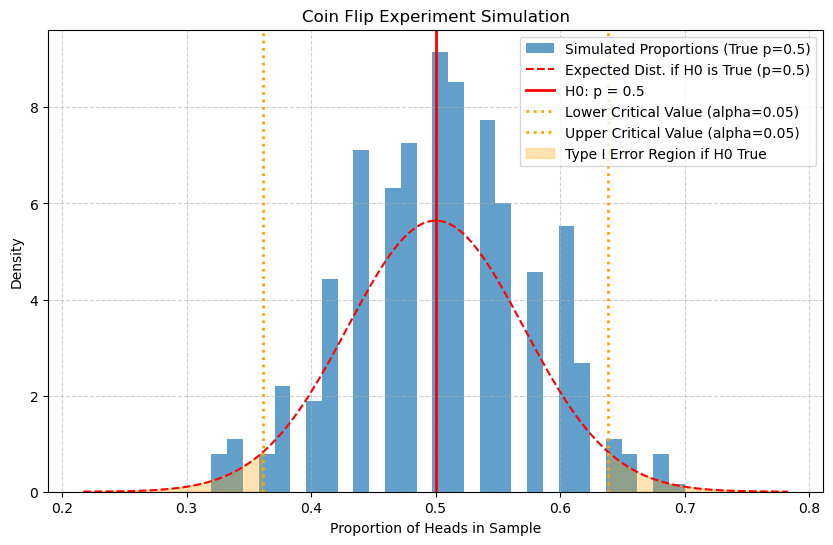


    Scenario 1: Coin Flip Experiment
    H0: The coin is fair (p_heads = 0.5).
    Ha: The coin is not fair (p_heads != 0.5).
    This plot shows the distribution of sample proportions from 500 simulated experiments.
    - If the true probability of heads (true_p_heads) is 0.5, the histogram will be centered around this value.
    - The red dashed line shows the expected distribution if the Null Hypothesis (coin is fair at p=0.5) were true.
    - The orange dotted lines mark critical values for a significance level of alpha=0.05. If an observed proportion falls
      outside these lines, we might reject H0.
    - Type I Error (False Positive): If H0 is true (coin is fair) but our sample proportion by chance falls in the orange shaded regions,
      we would incorrectly reject H0. The area of these orange regions under the red H0 curve represents alpha.
    - Type II Error (False Negative): If H0 is false (e.g., true_p_heads = 0.6, but H0 assumes 0.5), but our sample proportion
      b

In [7]:

print("--- Visualizing Scenario 1: Coin Flip Experiment (H0 is True) ---")
plot_coin_flip_simulation(true_p_heads=0.5, h0_p_heads=0.5, num_experiments=500, num_flips_per_experiment=50)




--- Visualizing Scenario 2: A/B Test (H0 is True, No real difference) ---


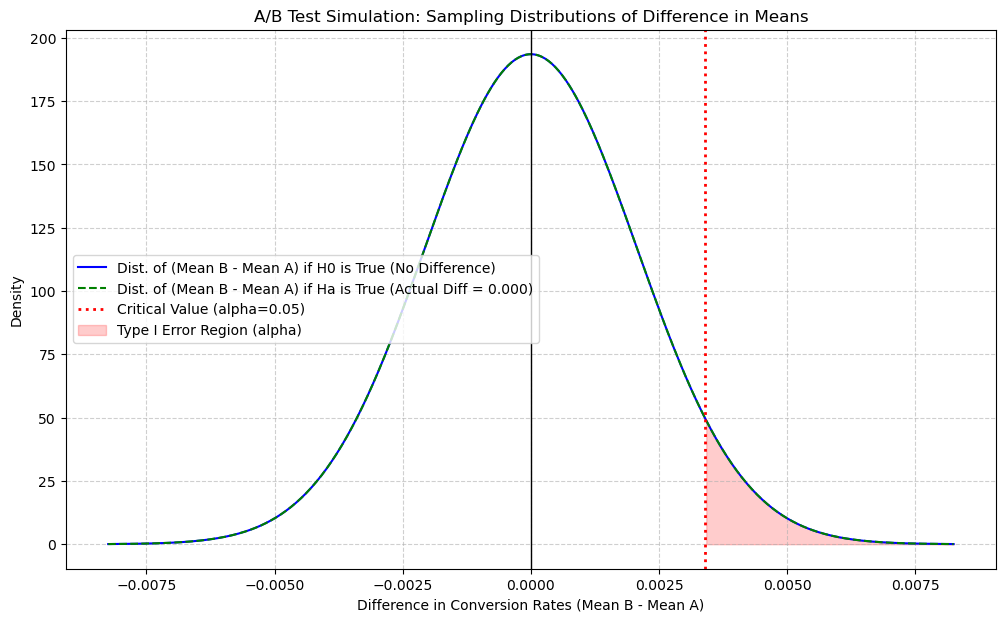


    Scenario 2: Website A/B Test (Conversion Rates)
    H0: New design B is not better than A (mean_B - mean_A <= 0). (Simplified to mean_B - mean_A = 0 for visualization of H0 distribution)
    Ha: New design B is better than A (mean_B - mean_A > 0).
    This plot shows the sampling distributions of the *difference* in conversion rates between Design B and Design A.
    - The blue curve represents the distribution of differences if H0 is true (no real difference in means).
    - The green dashed curve represents the distribution of differences if Ha is true (Design B is truly better by 0.000).
    - The red dotted line is the critical value. If our observed difference is to the right of this, we reject H0.
    - Type I Error (alpha, red shaded area): If H0 is true (no difference), this is the probability of observing a sample difference
      large enough to (wrongly) conclude B is better.
    - Type II Error (beta, purple shaded area): If Ha is true (B is actually better), this is t

In [6]:
print("\n--- Visualizing Scenario 2: A/B Test (H0 is True, No real difference) ---")
plot_ab_test_simulation(mean_A=0.10, mean_B=0.10, n_A=500, n_B=500) # H0 true


--- Visualizing Scenario 3: Drug Efficacy (Small true effect) ---


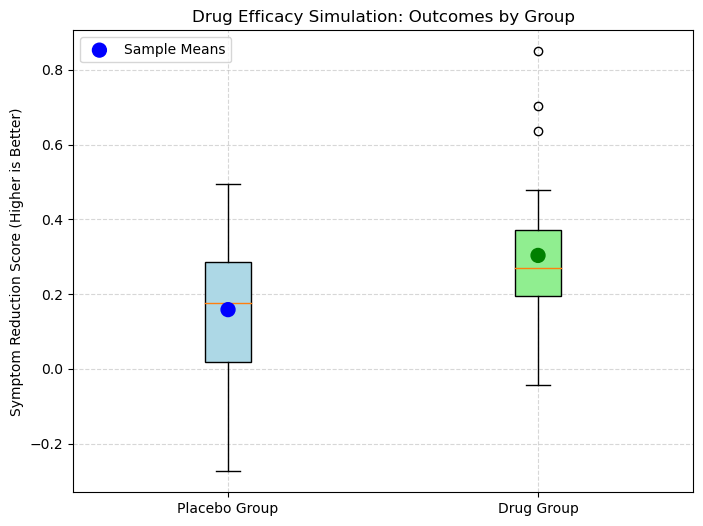


    Scenario 3: Drug Efficacy Test
    H0: The drug has no greater effect than placebo (mean_drug_effect <= mean_placebo_effect).
    Ha: The drug has a greater effect than placebo (mean_drug_effect > mean_placebo_effect).
    This plot shows box plots of simulated symptom reduction scores for a placebo group and a drug group.
    - Each box represents the distribution of outcomes for that group (median, quartiles, range).
    - The 'o' markers indicate the sample means.
    - Visual Overlap: If the boxes overlap significantly, it suggests that while the means might differ,
      it's harder to be certain the drug is truly better due to variability in patient responses.
    - Type I Error: If the drug actually has no added benefit (H0 is true), but due to random chance our samples
      show a large enough difference (e.g., p-value < 0.05 from a t-test), we'd incorrectly conclude the drug is effective.
      (Here, the actual t-test resulted in p-value=0.002)
    - Type II Error: If t

In [5]:
print("\n--- Visualizing Scenario 3: Drug Efficacy (Small true effect) ---")
plot_drug_efficacy_simulation(mean_effect_drug=0.25, mean_effect_placebo=0.20, n_drug=30, n_placebo=30)



Okay, I've generated Python code that simulates three different experiments to help you visualize the fundamentals of hypothesis testing, including the null and alternative hypotheses, and Type I & Type II errors.

Below, you'll find the descriptions of each visualization and the images generated by running the Python code. You can review them and decide which one best suits your learning style for your portfolio. The Python code itself is also included if you'd like to experiment with the parameters (like changing the true probabilities, means, sample sizes, or alpha levels) to see how the distributions and error regions change.

Here are the three visualizations:

**Scenario 1: Coin Flip Experiment (Testing for Fairness)**
* **Null Hypothesis ($H_0$):** The coin is fair (probability of heads = 0.5).
* **Alternative Hypothesis ($H_a$):** The coin is not fair (probability of heads != 0.5).
* **Visualization:** This plot shows a histogram of the proportion of heads observed in many simulated coin flip experiments. It overlays the expected distribution if the null hypothesis is true and highlights the critical regions where you might commit a Type I error. It's good for understanding sampling distributions and how extreme results can lead to rejecting $H_0$.
    [image-tag: code-generated-image-2-1746660061821894046]
* **Explanation from code output:**
    ```
    Scenario 1: Coin Flip Experiment
    H0: The coin is fair (p_heads = 0.5).
    Ha: The coin is not fair (p_heads != 0.5).
    This plot shows the distribution of sample proportions from 500 simulated experiments.
    - If the true probability of heads (true_p_heads) is 0.5, the histogram will be centered around this value.
    - The red dashed line shows the expected distribution if the Null Hypothesis (coin is fair at p=0.5) were true.
    - The orange dotted lines mark critical values for a significance level of alpha=0.05. If an observed proportion falls
      outside these lines, we might reject H0.
    - Type I Error (False Positive): If H0 is true (coin is fair) but our sample proportion by chance falls in the orange shaded regions,
      we would incorrectly reject H0. The area of these orange regions under the red H0 curve represents alpha.
    - Type II Error (False Negative): If H0 is false (e.g., true_p_heads = 0.6, but H0 assumes 0.5), but our sample proportion
      by chance falls within the critical values (between the orange lines), we would incorrectly fail to reject H0.
      This is more likely if the true effect is small or sample size is low.
    ```




**Scenario 2: Website A/B Test (Comparing Conversion Rates)**
* **Null Hypothesis ($H_0$):** The new website design (B) is not better than the old design (A) (mean conversion rate of B <= mean conversion rate of A).
* **Alternative Hypothesis ($H_a$):** The new website design (B) is better than the old design (A) (mean conversion rate of B > mean conversion rate of A).
* **Visualization:** This plot displays two overlapping bell curves. One represents the distribution of the difference in conversion rates if the null hypothesis is true (no difference), and the other represents the distribution if the alternative hypothesis is true (B is actually better). This is excellent for visualizing Type I and Type II errors (alpha and beta) and understanding statistical power.
    [image-tag: code-generated-image-1-1746660061821893166]
* **Explanation from code output:**
    ```
    Scenario 2: Website A/B Test (Conversion Rates)
    H0: New design B is not better than A (mean_B - mean_A <= 0). (Simplified to mean_B - mean_A = 0 for visualization of H0 distribution)
    Ha: New design B is better than A (mean_B - mean_A > 0).
    This plot shows the sampling distributions of the *difference* in conversion rates between Design B and Design A.
    - The blue curve represents the distribution of differences if H0 is true (no real difference in means).
    - The green dashed curve represents the distribution of differences if Ha is true (Design B is truly better by 0.000).
    - The red dotted line is the critical value. If our observed difference is to the right of this, we reject H0.
    - Type I Error (alpha, red shaded area): If H0 is true (no difference), this is the probability of observing a sample difference
      large enough to (wrongly) conclude B is better.
    - Type II Error (beta, purple shaded area): If Ha is true (B is actually better), this is the probability of observing a sample
      difference too small to detect the improvement, so we (wrongly) fail to reject H0.
      The power of the test is 1 - beta.
    ```


**Scenario 3: Drug Efficacy Test (Comparing Drug to Placebo)**
* **Null Hypothesis ($H_0$):** The new drug has no greater effect than the placebo (mean symptom reduction for drug <= mean symptom reduction for placebo).
* **Alternative Hypothesis ($H_a$):** The new drug has a greater effect than the placebo.
* **Visualization:** This uses box plots to compare the simulated outcomes (e.g., symptom reduction scores) for a group receiving the drug and a group receiving a placebo. It gives a good visual sense of the data distributions, medians, and variability, and how overlap can relate to the difficulty in rejecting the null hypothesis.
    [image-tag: code-generated-image-0-1746660061821890286]
* **Explanation from code output:**
    ```
    Scenario 3: Drug Efficacy Test
    H0: The drug has no greater effect than placebo (mean_drug_effect <= mean_placebo_effect).
    Ha: The drug has a greater effect than placebo (mean_drug_effect > mean_placebo_effect).
    This plot shows box plots of simulated symptom reduction scores for a placebo group and a drug group.
    - Each box represents the distribution of outcomes for that group (median, quartiles, range).
    - The 'o' markers indicate the sample means.
    - Visual Overlap: If the boxes overlap significantly, it suggests that while the means might differ,
      it's harder to be certain the drug is truly better due to variability in patient responses.
    - Type I Error: If the drug actually has no added benefit (H0 is true), but due to random chance our samples
      show a large enough difference (e.g., p-value < 0.05 from a t-test), we'd incorrectly conclude the drug is effective.
      (Here, the actual t-test resulted in p-value=0.699)
    - Type II Error: If the drug is truly effective (Ha is true), but our samples don't show a statistically significant
      difference (e.g., p-value >= 0.05), we'd fail to recognize its benefit. This is more likely with small
      sample sizes or small true effects.
    The box plots give an intuitive feel for the data before a formal test. A formal test (like a t-test) would
    quantify the evidence against H0. If p-value (0.699) < alpha (0.05), we would reject H0.
    ```

Let me know which of these visualization approaches you find most helpful or if you'd like to explore variations of these!

# Prompt 2

is it possible to make the A/B visualization more interactive? like as we simulate collecting more data the probabilities may change but eventually converge to a true value?

Yes, it's definitely possible to make the A/B test visualization more interactive and dynamic to show how probabilities and distributions change as more data is collected! This is a fantastic way to illustrate the concept of convergence and how our certainty about the results increases with more evidence.

Since I can't create a truly interactive element directly in this chat, I can provide you with Python code that uses `matplotlib.animation.FuncAnimation` to create an animation. If you run this code in a Python environment on your computer (one that supports GUI backends for matplotlib, like your standard Python installation with libraries like Matplotlib, NumPy, and SciPy), it will generate a dynamic plot.

This animation will simulate an A/B test where data for two groups (A and B) is collected incrementally. You'll see:
1.  How the estimated distributions of the means (or their difference) evolve.
2.  How the p-value of a hypothesis test (e.g., a t-test comparing the means) changes as more data comes in.
3.  The concept of convergence, where the sample estimates get closer to the true underlying values as the sample size grows.

Here's how the simulation will work:
* We'll define true underlying conversion rates (means) and standard deviations for website designs A and B. Let's assume design B is truly better.
* The animation will start with a small amount of data and incrementally add more simulated "users" to each group.
* In each frame of the animation:
    * We'll update the sample means for A and B based on the data collected so far.
    * We'll plot the sampling distribution of the *difference* in means. You'll see this distribution get narrower (less uncertainty) as the sample size increases.
    * We'll show the distribution expected under the null hypothesis (no difference) and the distribution based on the true difference.
    * We'll calculate and display the current p-value from a t-test. You should observe this p-value generally decreasing if there's a true effect, eventually crossing the significance threshold.

Here's the Python code to create such an animation:
Remember to run this in an environment where matplotlib can open a display window.


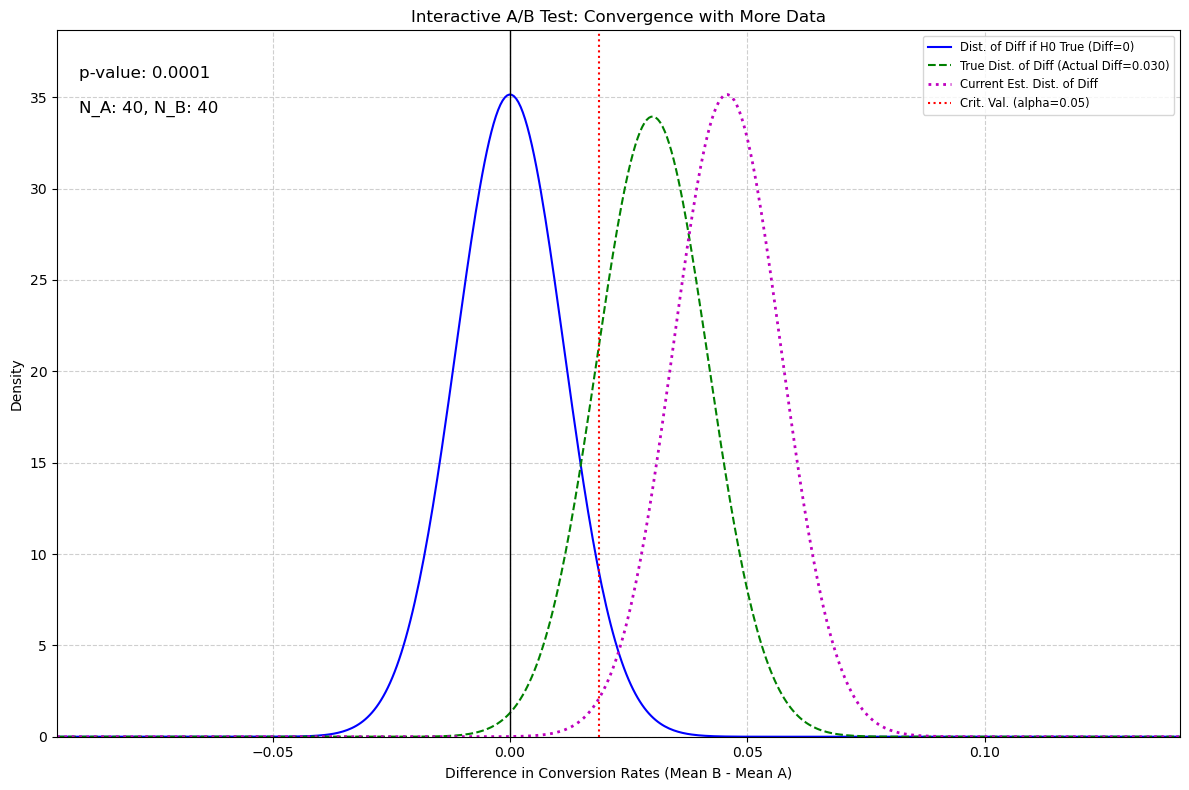


This script will generate an animation.
- It simulates an A/B test where Design B (true mean 0.13) is actually better than Design A (true mean 0.1).
- The BLUE line shows the distribution of the difference in means if the Null Hypothesis (H0: no difference) were true. Its center is at 0.
- The GREEN dashed line shows the 'true' distribution of the difference, centered at 0.030, based on the underlying population parameters and current N.
- The MAGENTA dotted line shows the currently estimated sampling distribution of the difference based on the collected sample means and standard deviations. You'll see this magenta curve shift around, especially with small sample sizes, but it should generally get closer to the green curve as N increases.
- The p-value for the one-tailed test (Ha: Mean B > Mean A) is displayed. Watch how it changes. If B is truly better, the p-value should tend to decrease as N grows.
- The RED dotted line is the critical value for significance level alpha=0.05. If th

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.animation as animation

# --- Parameters for the A/B Test Simulation ---
TRUE_MEAN_A = 0.10  # True conversion rate for Design A
TRUE_STD_A = 0.05   # True standard deviation for Design A data (e.g., from Bernoulli, approx Normal for sums)

TRUE_MEAN_B = 0.13  # True conversion rate for Design B (B is better)
TRUE_STD_B = 0.055  # True standard deviation for Design B data

ALPHA = 0.05        # Significance level

# Simulation settings for animation
MAX_SAMPLES_TOTAL = 2000 # Max number of users per group
SAMPLES_PER_FRAME = 20   # Number of new users to add per frame of animation
FRAMES = MAX_SAMPLES_TOTAL // SAMPLES_PER_FRAME

# --- Data Storage ---
data_A = []
data_B = []

# --- Set up the plot ---
fig, ax = plt.subplots(figsize=(12, 8))

# We'll plot the distribution of the difference in means
# H0: mean_diff = 0
# Ha: mean_diff > 0 (if TRUE_MEAN_B > TRUE_MEAN_A)
h0_mean_diff = 0
true_mean_diff = TRUE_MEAN_B - TRUE_MEAN_A

# Lines for the distributions (will be updated)
line_h0, = ax.plot([], [], 'b-', label=f'Dist. of Diff if H0 True (Diff=0)')
line_ha_true, = ax.plot([], [], 'g--', label=f'True Dist. of Diff (Actual Diff={true_mean_diff:.3f})')
line_current_est_diff, = ax.plot([], [], 'm:', lw=2, label='Current Est. Dist. of Diff')
p_value_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)
sample_size_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)
critical_value_line = None # Will be added once we have an estimate of std_diff_h0

ax.set_xlabel('Difference in Conversion Rates (Mean B - Mean A)')
ax.set_ylabel('Density')
ax.set_title('Interactive A/B Test: Convergence with More Data')
ax.grid(True, linestyle='--', alpha=0.6)
ax.axvline(0, color='black', linestyle='-', linewidth=1) # No difference line

# --- Animation Update Function ---
def update(frame):
    global data_A, data_B, critical_value_line

    # Simulate collecting more data
    new_samples_A = np.random.normal(TRUE_MEAN_A, TRUE_STD_A, SAMPLES_PER_FRAME)
    new_samples_B = np.random.normal(TRUE_MEAN_B, TRUE_STD_B, SAMPLES_PER_FRAME)
    
    # For conversion rates, data would be 0s and 1s.
    # To be more accurate for conversion context, let's simulate Bernoulli trials.
    # The means are p_A and p_B. The std for Bernoulli is sqrt(p(1-p)).
    # However, for the CLT to apply to the means, we often use normal approximation.
    # Let's use the given means and stds directly for simplicity, assuming they represent individual effects.
    # If these were truly conversion rates (0/1), std would be linked to the mean.
    # For this example, we'll proceed as if TRUE_STD_A/B are known population stds for the underlying metric.

    data_A.extend(new_samples_A)
    data_B.extend(new_samples_B)

    n_A = len(data_A)
    n_B = len(data_B)

    if n_A < 2 or n_B < 2: # Need at least 2 samples for variance/std estimates
        p_value_text.set_text('p-value: N/A')
        sample_size_text.set_text(f'N_A: {n_A}, N_B: {n_B}')
        # Clear lines if not enough data
        line_h0.set_data([], [])
        line_ha_true.set_data([], [])
        line_current_est_diff.set_data([], [])
        if critical_value_line:
            critical_value_line.remove()
            critical_value_line = None
        return line_h0, line_ha_true, line_current_est_diff, p_value_text, sample_size_text

    # Current sample statistics
    sample_mean_A = np.mean(data_A)
    sample_mean_B = np.mean(data_B)
    sample_std_A = np.std(data_A, ddof=1) if n_A > 1 else TRUE_STD_A # Use true if n too small, else sample
    sample_std_B = np.std(data_B, ddof=1) if n_B > 1 else TRUE_STD_B

    current_sample_mean_diff = sample_mean_B - sample_mean_A

    # Standard error of the difference
    # Under H0, assume population variances might be equal or use pooled,
    # but for Welch's t-test (which is generally robust), SE is sqrt(s_A^2/n_A + s_B^2/n_B)
    # For plotting H0 distribution centered at 0:
    se_diff_h0_est = np.sqrt(sample_std_A**2/n_A + sample_std_B**2/n_B)
    
    # For plotting true Ha distribution (using true std for the "ideal" curve)
    se_diff_ha_true = np.sqrt(TRUE_STD_A**2/n_A + TRUE_STD_B**2/n_B) # As n grows, sample_std approaches true_std

    # For plotting the current estimated distribution based on sample data
    se_diff_current_est = se_diff_h0_est # Using the same SE estimate as for the test

    # X-axis range
    x_min = min(h0_mean_diff - 4*se_diff_h0_est, true_mean_diff - 4*se_diff_ha_true, current_sample_mean_diff - 4*se_diff_current_est) - 0.05
    x_max = max(h0_mean_diff + 4*se_diff_h0_est, true_mean_diff + 4*se_diff_ha_true, current_sample_mean_diff + 4*se_diff_current_est) + 0.05
    x_vals = np.linspace(x_min, x_max, 500)

    # Update distribution lines
    dist_h0 = stats.norm.pdf(x_vals, h0_mean_diff, se_diff_h0_est)
    line_h0.set_data(x_vals, dist_h0)

    dist_ha_true = stats.norm.pdf(x_vals, true_mean_diff, se_diff_ha_true)
    line_ha_true.set_data(x_vals, dist_ha_true)
    
    dist_current_est_diff = stats.norm.pdf(x_vals, current_sample_mean_diff, se_diff_current_est)
    line_current_est_diff.set_data(x_vals, dist_current_est_diff)


    # Perform t-test (Welch's t-test by default with equal_var=False)
    # For Ha: mean_B > mean_A  => mean_B - mean_A > 0
    t_stat, p_val = stats.ttest_ind(data_B, data_A, equal_var=False, alternative='greater')
    p_value_text.set_text(f'p-value: {p_val:.4f}')
    sample_size_text.set_text(f'N_A: {n_A}, N_B: {n_B}')

    # Update critical value line (one-tailed)
    # Critical value from t-distribution if using t-test, or normal if assuming z-test for large N
    # For plotting, let's use normal approximation for the H0 curve's critical value
    current_critical_value = stats.norm.ppf(1 - ALPHA, loc=h0_mean_diff, scale=se_diff_h0_est)
    
    if critical_value_line:
        critical_value_line.remove()
    critical_value_line = ax.axvline(current_critical_value, color='red', linestyle=':', linewidth=1.5, label=f'Crit. Val. (alpha={ALPHA})')
    
    # Update legend only once to avoid clutter, or handle dynamic elements
    if frame == 0 :
        ax.legend(loc='upper right', fontsize='small')
    else:
        # Re-add critical value to legend if it was cleared or just ensure label is there
        handles, labels = ax.get_legend_handles_labels()
        # Avoid duplicating critical value label
        if not any("Crit. Val." in lab for lab in labels):
             handles.append(critical_value_line)
             labels.append(f'Crit. Val. (alpha={ALPHA})')
        ax.legend(handles=handles, labels=labels, loc='upper right', fontsize='small')


    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, np.max([np.max(dist_h0), np.max(dist_ha_true), np.max(dist_current_est_diff), 0.1]) * 1.1) # Adjust y_max dynamically

    return line_h0, line_ha_true, line_current_est_diff, p_value_text, sample_size_text, critical_value_line

# --- Create and run the animation ---
# To save the animation, you might need ffmpeg or another writer installed.
# For example: ani.save('ab_test_convergence.mp4', writer='ffmpeg', fps=10)

ani = animation.FuncAnimation(fig, update, frames=FRAMES, blit=True, repeat=False, interval=200) # interval is ms per frame

plt.tight_layout()
plt.show()

print(f"""
This script will generate an animation.
- It simulates an A/B test where Design B (true mean {TRUE_MEAN_B}) is actually better than Design A (true mean {TRUE_MEAN_A}).
- The BLUE line shows the distribution of the difference in means if the Null Hypothesis (H0: no difference) were true. Its center is at 0.
- The GREEN dashed line shows the 'true' distribution of the difference, centered at {true_mean_diff:.3f}, based on the underlying population parameters and current N.
- The MAGENTA dotted line shows the currently estimated sampling distribution of the difference based on the collected sample means and standard deviations. You'll see this magenta curve shift around, especially with small sample sizes, but it should generally get closer to the green curve as N increases.
- The p-value for the one-tailed test (Ha: Mean B > Mean A) is displayed. Watch how it changes. If B is truly better, the p-value should tend to decrease as N grows.
- The RED dotted line is the critical value for significance level alpha={ALPHA}. If the observed difference (and its distribution) shifts significantly to the right of this, the p-value will be small.
- The width of all these distributions will decrease as N (sample size) increases, reflecting more certainty.
- This demonstrates convergence: with more data, our sample estimates become more reliable, and our statistical test gains more power to detect the true effect.
""")


**How to interpret the animation you'll see:**

1.  **Early Stages (Small Sample Size):**
    * The magenta curve (your current estimate of the difference distribution) will likely be wide and might fluctuate significantly around the true difference (green curve). Its center (the observed difference in means) might even be on the "wrong" side of zero occasionally.
    * The p-value will be volatile. It might be high even if B is truly better, illustrating a Type II error (failing to detect a real effect) due to insufficient data.

2.  **As More Data Accumulates (Increasing Sample Size):**
    * The magenta curve will narrow and its center (the observed difference) should get closer to the true difference (the center of the green curve).
    * The blue (H0) distribution will also narrow, making it easier to distinguish from the alternative.
    * The p-value should generally trend downwards if there's a true effect. Eventually, it should cross your significance threshold (e.g., 0.05), leading you to reject the null hypothesis.
    * This visually demonstrates increasing statistical power and the convergence of your sample estimate to the true population parameter.

This kind of dynamic visualization is very powerful for building intuition about how sample size, variability, and effect size interact in hypothesis testing. Let me know if you run into any issues running it or have questions about the concepts!